# Temat testów

1. Poprawność

HO: Brak istotnej statystycznie różnicy w poprawności odpowiedzi między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w poprawności odpowiedzi między grupami grafik A i B.

2. Trudność

HO: Brak istotnej statystycznie różnicy w trudności zadania między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w trudności zadania między grupami grafik A i B.

3. Czas odpowiedzi

HO: Brak istotnej statystycznie różnicy w czasie odpowiedzi między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w czasie odpowiedzi między grupami grafik A i B.

Poziom istotności: $\alpha=0.05$

In [2]:
import pandas as pd

from functions.tests.dependent_groups.two_groups import wilcoxon_test, ttest_or_wilcoxon, mcnemar_test
from functions.plots import plot_heatmap, plot_two_boxplots, plot_two_density
from functions.set_preparations import prepare_row

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv', index_col='ID')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv', index_col='ID')

Sety:
- kolekcja A vs kolekcja B
- suma A vs suma B
- 1a vs 1b
- 2a vs 2b
- 3a vs 3b

In [4]:
# przygotowanie kolekcji - reszta setów już jest
corrA = prepare_row(df_answers.filter(regex='.*a_corr$'))
confA = prepare_row(df_answers.filter(regex='.*a_trud$'))
timeA = prepare_row(df_time.filter(regex='^Duration.*a'))
corrB = prepare_row(df_answers.filter(regex='.*b_corr$'))
confB = prepare_row(df_answers.filter(regex='.*b_trud$'))
timeB = prepare_row(df_time.filter(regex='^Duration.*b'))
df_coll = pd.DataFrame({'corr_A': corrA, 'corr_B': corrB, 'diff_A': confA, 'diff_B': confB, 'time_A': timeA, 'time_B': timeB})

df_coll.head()

,corr_A,corr_B,diff_A,diff_B,time_A,time_B
0,1,1,3,1,34682,96628
1,1,1,1,2,53564,33598
2,1,1,2,1,85546,33632
3,1,1,3,2,61197,30882
4,1,1,4,2,42031,30282


In [5]:
ALPHA = 0.05

Poprawność A vs B

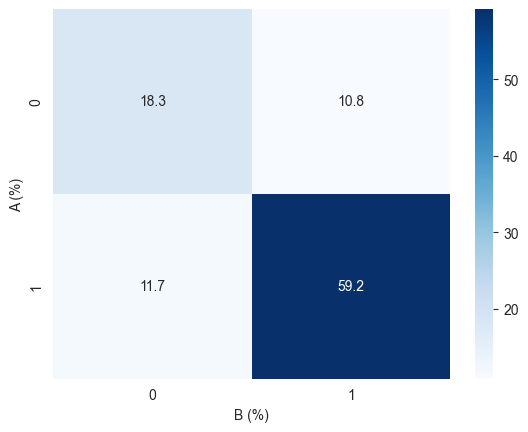

corr_B   0   1
corr_A        
0       22  13
1       14  71
McNemar statistic: 13.0
p-value: 1.0
Brak podstaw do odrzucenia H0.


In [6]:
# kolekcje
results = []
var1 = 'corr_A'
var2 = 'corr_B'
plot_heatmap(df_coll, var1, var2, 'A', 'B', cmap='Blues')
p = mcnemar_test(df_coll, var1, var2, ALPHA)
results.append(p)

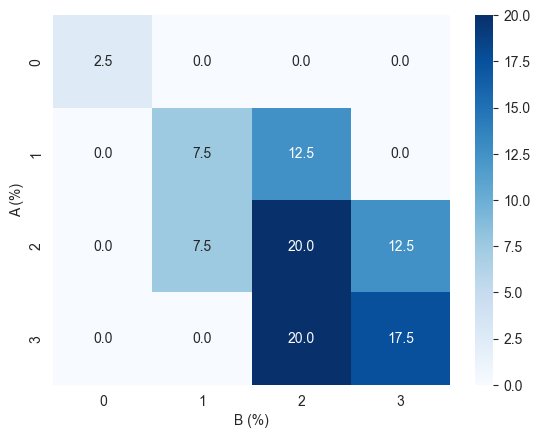

SumCorr_b  0  1  2  3
SumCorr_a            
0          1  0  0  0
1          0  3  5  0
2          0  3  8  5
3          0  0  8  7
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.


In [7]:
# sumy
var1 = 'SumCorr_a'
var2 = 'SumCorr_b'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
p = mcnemar_test(df_answers, var1, var2, ALPHA)
results.append(p)

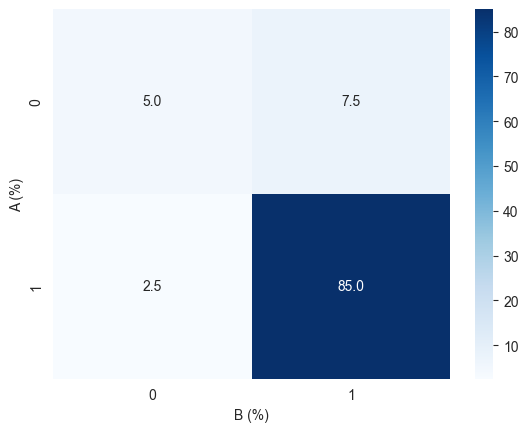

1b_corr  0   1
1a_corr       
0        2   3
1        1  34
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.


In [8]:
# 1
var1 = '1a_corr'
var2 = '1b_corr'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
p = mcnemar_test(df_answers, var1, var2, ALPHA)
results.append(p)

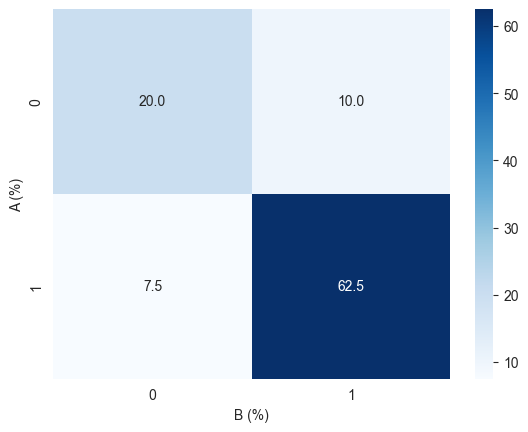

2b_corr  0   1
2a_corr       
0        8   4
1        3  25
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.


In [9]:
# 2
var1 = '2a_corr'
var2 = '2b_corr'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
p = mcnemar_test(df_answers, var1, var2, ALPHA)
results.append(p)

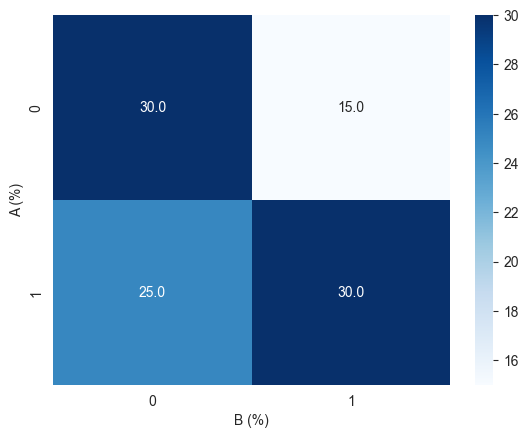

3b_corr   0   1
3a_corr        
0        12   6
1        10  12
McNemar statistic: 6.0
p-value: 0.454498291015625
Brak podstaw do odrzucenia H0.


In [10]:
# 3
var1 = '3a_corr'
var2 = '3b_corr'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
p = mcnemar_test(df_answers, var1, var2, ALPHA)
results.append(p)

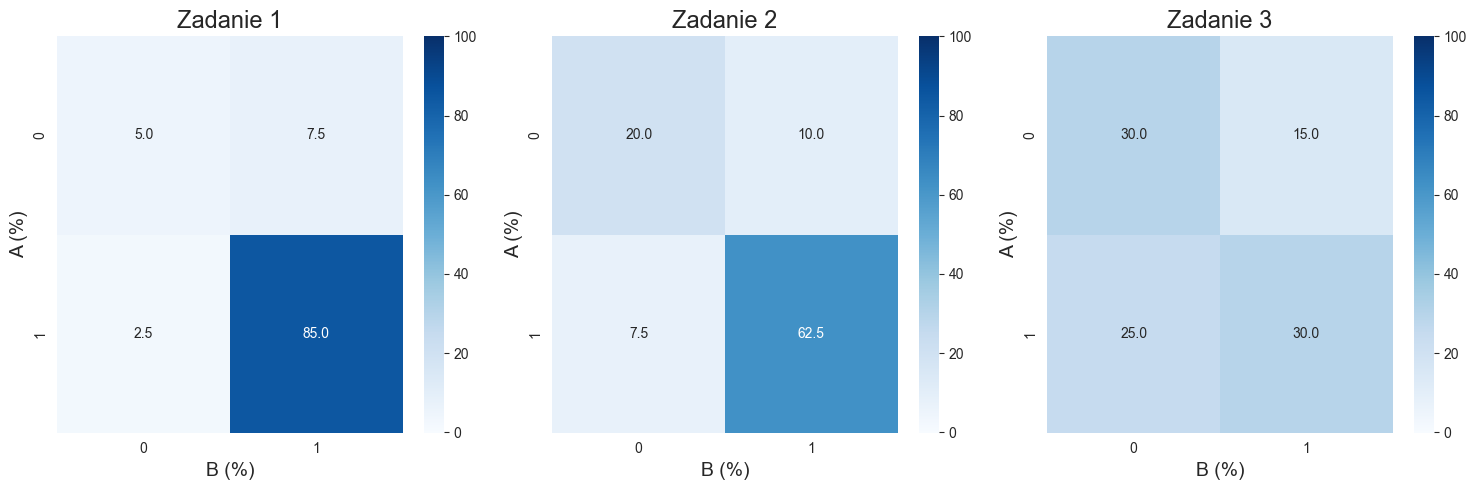

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_1(df: pd.DataFrame, column1: str, column2: str, label1: str, label2: str, title="", cmap="YlGnBu", ax=None):
    """
    Generates a heatmap based on a contingency table.

    Args:
    df (DataFrame): Data in the form of a DataFrame.
    column1 (str): Name of first categorical variable.
    column2 (str): Name of second categorical variable.
    label1 (str): Label for column1.
    label2 (str): Label for column2.
    title (str): Title of the plot (optional).
    cmap (str): Color palette (optional).

    Returns:
    None
    """
    table = pd.crosstab(df[column1], df[column2], normalize=True) * 100  # Przekształcenie na procenty

    sns.heatmap(table, annot=True, fmt=".1f", cmap=cmap, ax=ax)  # Wygenerowanie heatmapy
    plt.xlabel(label2 + " (%)")  # Dodanie znaku % do etykiety osi x
    plt.ylabel(label1 + " (%)")  # Dodanie znaku % do etykiety osi y # Dodanie znaku % do tytułu
    plt.show()
    # table = create_contingency_table(df, column1, column2)
    # sns.heatmap(table, annot=True, fmt="d", cmap=cmap)
    # plt.xlabel(label2)
    # plt.ylabel(label1)
    # plt.title(title)
    # plt.show()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # 1 wiersz, 3 kolumny

vmin = min(df_answers[['1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr']].values.flatten())
vmax = max(df_answers[['1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr']].values.flatten())

# Wywołanie funkcji dla każdego subplota
for i in range(3):
    table = pd.crosstab(df_answers[f'{i+1}a_corr'], df_answers[f'{i+1}b_corr'], normalize=True) * 100  # Przekształcenie na procenty

    sns.heatmap(table, annot=True, fmt=".1f", cmap='Blues', vmin=100, vmax=0, ax=axes[i])  # Wygenerowanie heatmapy
    axes[i].set_xlabel('B' + " (%)", fontsize=14)  # Dodanie znaku % do etykiety osi x
    axes[i].set_ylabel('A' + " (%)", fontsize=14)  # Dodanie znaku % do etykiety osi y
    axes[i].set_title(f'Zadanie {i+1}', fontsize=17)

# Dopasowanie layoutu i wyświetlenie
plt.tight_layout()
plt.show()

Trudność - A vs B

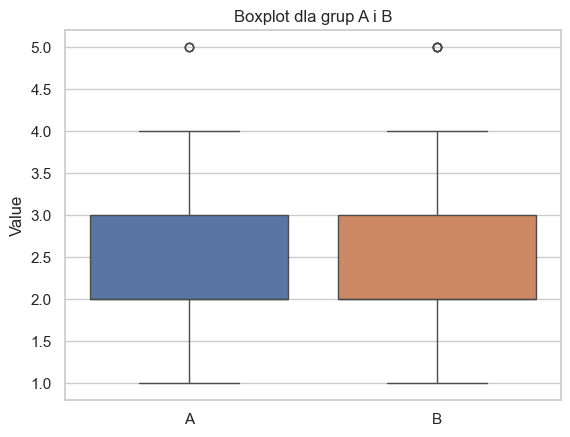

Wilcoxon statistic: 1584.5
p-value: 0.5729227045557926
Brak podstaw do odrzucenia H0.


In [12]:
# kolekcje
var1 = 'diff_A'
var2 = 'diff_B'
plot_two_boxplots(df_coll[var1], df_coll[var2])
p = wilcoxon_test([df_coll[var1], df_coll[var2]], ALPHA)
results.append('\n')
results.append(p)

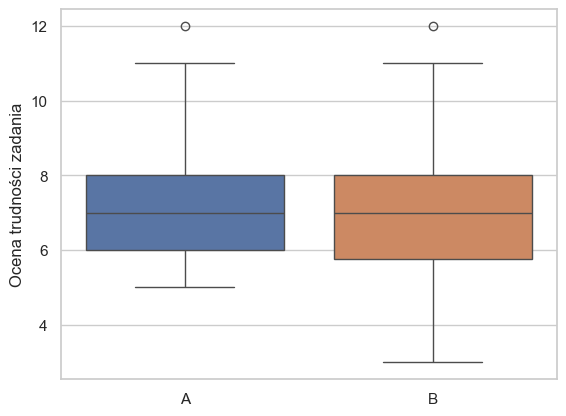

Wilcoxon statistic: 197.5
p-value: 0.466539772751279
Brak podstaw do odrzucenia H0.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [13]:
# sumy
var1 = 'SumTrud_a'
var2 = 'SumTrud_b'
plot_two_boxplots(df_answers[var1], df_answers[var2], 'A', 'B', 'Ocena trudności zadania', '')
p = wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)
results.append(p)

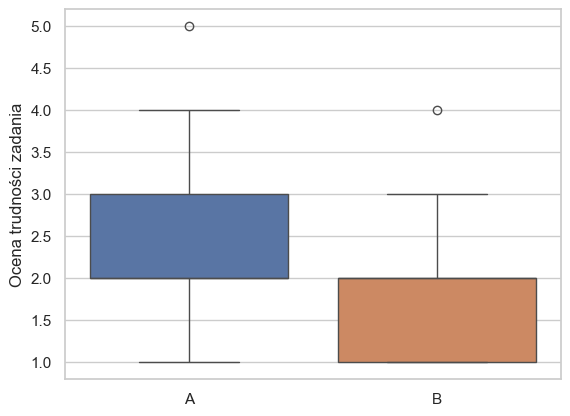

Wilcoxon statistic: 121.0
p-value: 0.009168385235709786
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [14]:
# 1
var1 = '1a_trud'
var2 = '1b_trud'
plot_two_boxplots(df_answers[var1], df_answers[var2], 'A', 'B', 'Ocena trudności zadania', '')
p = wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)
results.append(p)

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1628/3546411429.py:25: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1628/3546411429.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


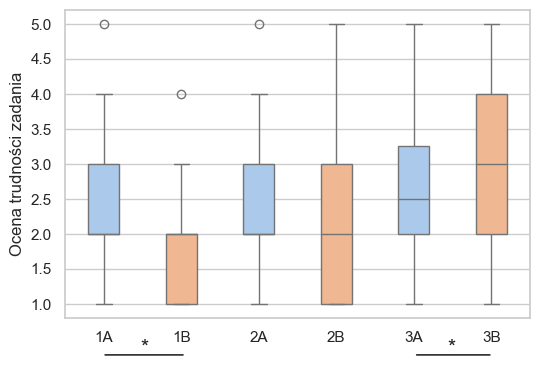

In [15]:
plt.figure(figsize=(6, 4))
df_long = pd.melt(df_answers, value_vars=['1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud'],
                  var_name='Pair', value_name='Value')

# Wygenerowanie wykresu z 6 pudełkami
colors = sns.color_palette('pastel', n_colors=2)  # Wybór kolorów z palety Set3
hue_order = ['1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud']
labels = ['1A', '1B', '2A', '2B', '3A', '3B']

plt.annotate(
    '', xy=(0.08, -0.12), xycoords='axes fraction', xytext=(0.26, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.17, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate(
    '', xy=(0.75, -0.12), xycoords='axes fraction', xytext=(0.92, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)


# Wygenerowanie wykresu z 6 pudełkami
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
plt.xlabel('')
ax.set_xticklabels(labels)
plt.ylabel('Ocena trudności zadania')
plt.show()


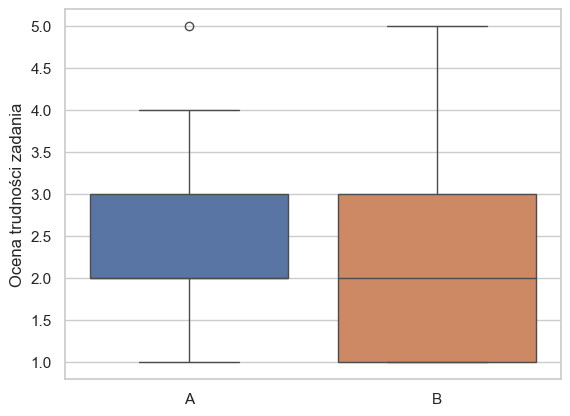

Wilcoxon statistic: 149.0
p-value: 0.32215759615581485
Brak podstaw do odrzucenia H0.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [16]:
# 2
var1 = '2a_trud'
var2 = '2b_trud'
plot_two_boxplots(df_answers[var1], df_answers[var2], 'A', 'B', 'Ocena trudności zadania', '')
p = wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)
results.append(p)

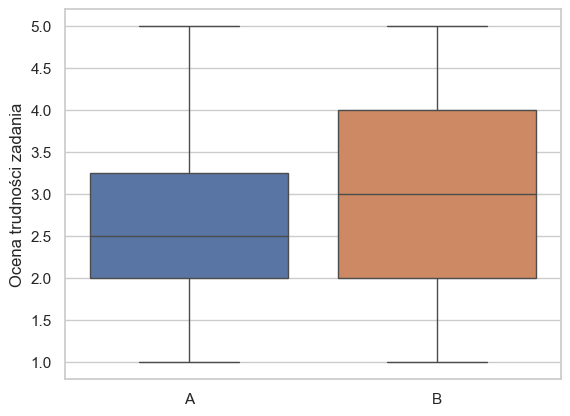

Wilcoxon statistic: 45.0
p-value: 0.0016717283964848024
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [17]:
# 3
var1 = '3a_trud'
var2 = '3b_trud'
plot_two_boxplots(df_answers[var1], df_answers[var2], 'A', 'B', 'Ocena trudności zadania', '')
p = wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)
results.append(p)

Czas - A vs B

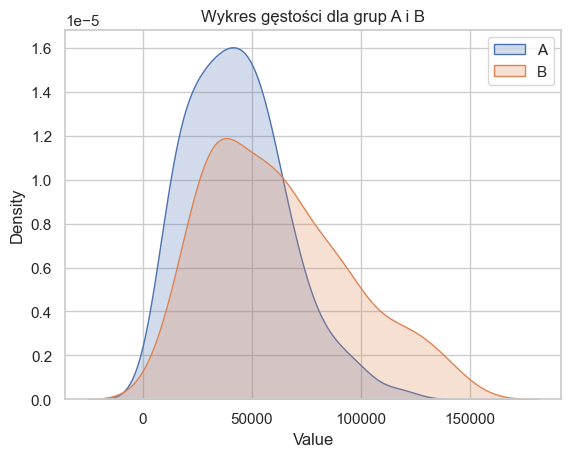

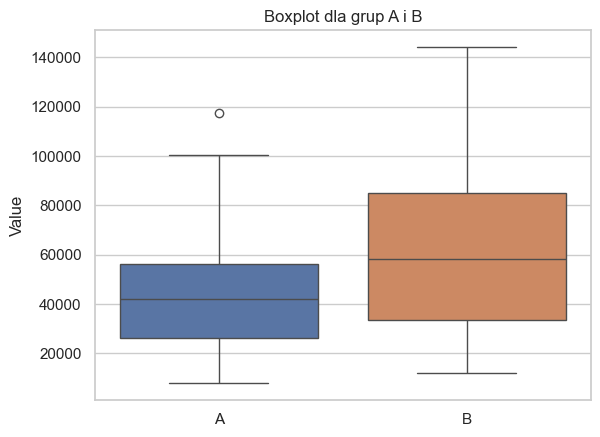

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1580.5
p-value: 7.989105206623395e-08
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [18]:
# kolekcje
var1 = 'time_A'
var2 = 'time_B'
plot_two_density(df_coll[var1], df_coll[var2])
plot_two_boxplots(df_coll[var1], df_coll[var2])
p = ttest_or_wilcoxon([df_coll[var1], df_coll[var2]], ALPHA)
results.append('\n')
results.append(p)

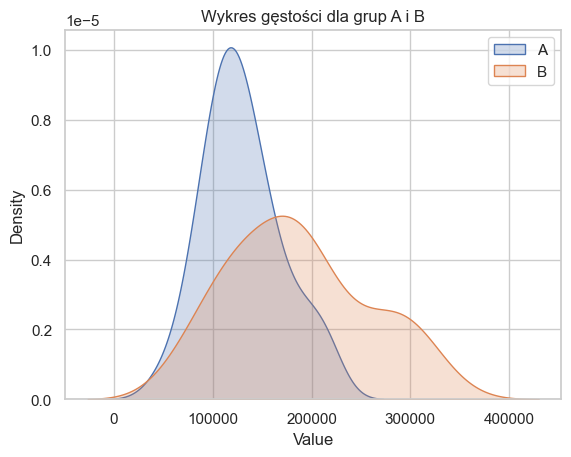

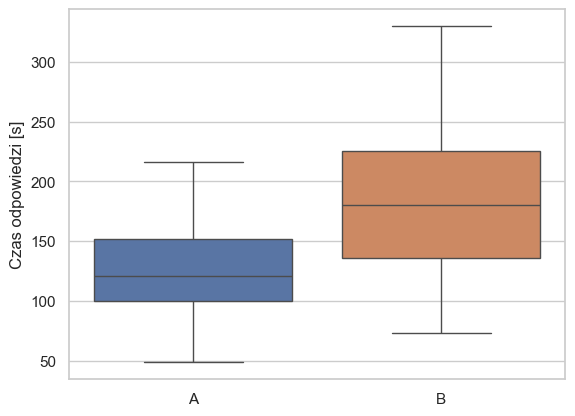

Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 78.0
p-value: 1.1621450539678335e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [19]:
# sumy
var1 = 'SumTime_a'
var2 = 'SumTime_b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1]/1000, df_time[var2]/1000, 'A', 'B', 'Czas odpowiedzi [s]', '')
p = ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)
results.append(p)

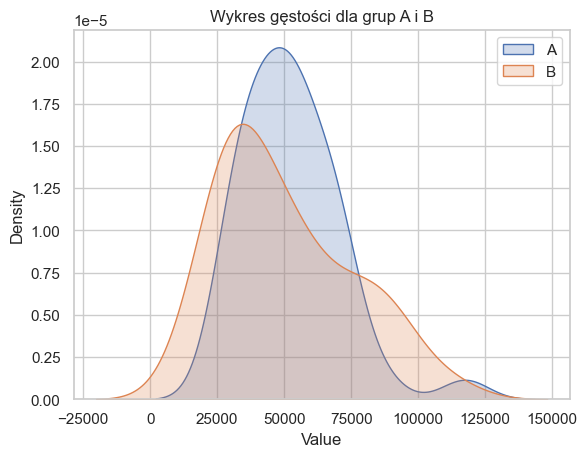

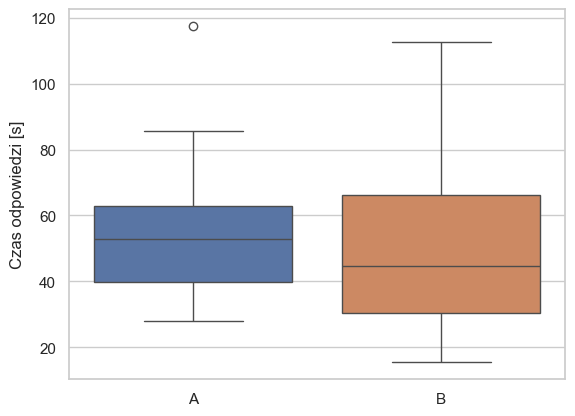

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 364.0
p-value: 0.5448004511072213
Brak podstaw do odrzucenia H0.


In [20]:
# 1
var1 = 'Duration_1a'
var2 = 'Duration_1b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1]/1000, df_time[var2]/1000, 'A', 'B', 'Czas odpowiedzi [s]', '')
p = ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)
results.append(p)

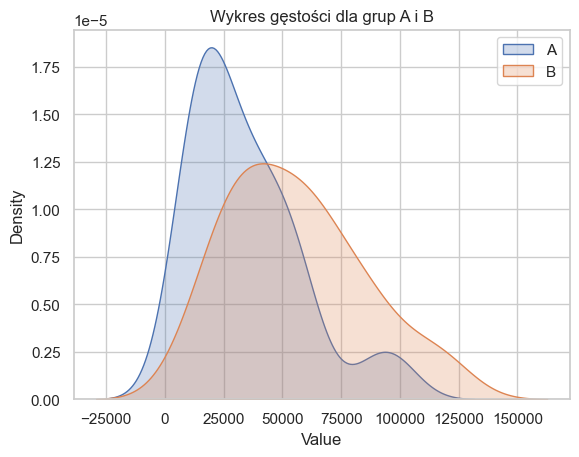

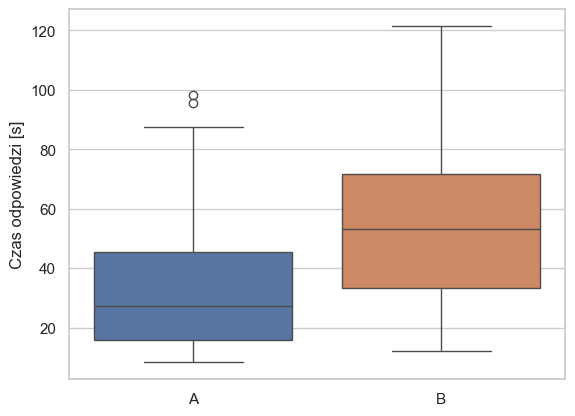

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 133.0
p-value: 9.446514923183713e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [21]:
# 2
var1 = 'Duration_2a'
var2 = 'Duration_2b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1]/1000, df_time[var2]/1000, 'A', 'B', 'Czas odpowiedzi [s]', '')
p = ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)
results.append(p)

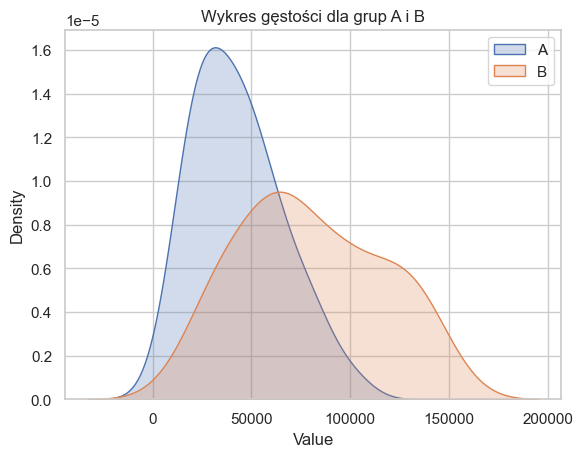

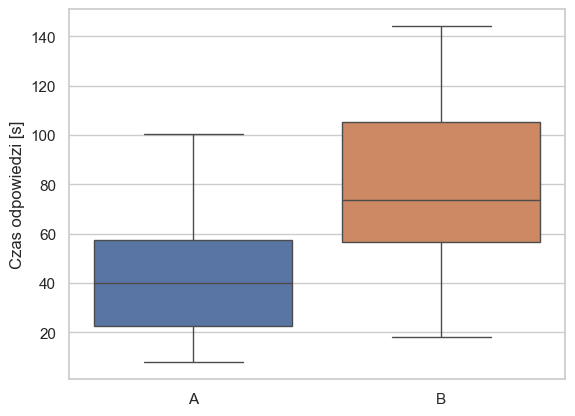

Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 34.0
p-value: 6.775735528208315e-09
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [22]:
# 3
var1 = 'Duration_3a'
var2 = 'Duration_3b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1]/1000, df_time[var2]/1000, 'A', 'B', 'Czas odpowiedzi [s]', '')
p = ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)
results.append(p)

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1628/233127745.py:28: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order,width=0.4)
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1628/233127745.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


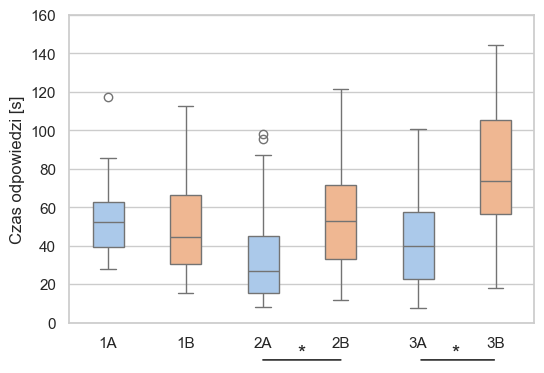

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
value_vars=['Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']
for val in value_vars:
    df_time[val] = df_time[val]/1000
df_long = pd.melt(df_time, value_vars=value_vars,
                  var_name='Pair', value_name='Value')

# Wygenerowanie wykresu z 6 pudełkami
colors = sns.color_palette('pastel', n_colors=2)  # Wybór kolorów z palety Set3
hue_order = ['Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']
labels = ['1A', '1B', '2A', '2B', '3A', '3B']
plt.annotate(
    '', xy=(0.41, -0.12), xycoords='axes fraction', xytext=(0.59, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.5, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate(
    '', xy=(0.75, -0.12), xycoords='axes fraction', xytext=(0.92, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

# Wygenerowanie wykresu z 6 pudełkami
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order,width=0.4)
plt.xlabel('')
plt.ylim(0, 160)
ax.set_xticklabels(labels)
plt.ylabel('Czas odpowiedzi [s]')
plt.show()

Podsumowanie:
Istotna różnica statystyczna występuje w:
- ocenie trudności zadania: między grupami 1a vs 1b oraz 3a vs 3b
- czasie odpowiedzi: między grupami kolekcja A vs kolekcja B, suma A vs suma B, 2a vs 2b, 3a vs 3b

In [24]:
# import csv
# with open('./results/corr_diff_time.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     row = []
#     for item in results:
#         if item != '\n':
#             row.append(item)
#         else:
#             writer.writerow(row)
#             row = []
#     if row:  # Sprawdzamy, czy jest coś do zapisania w ostatnim wierszu
#         writer.writerow(row)